### Count or Frequency encoding

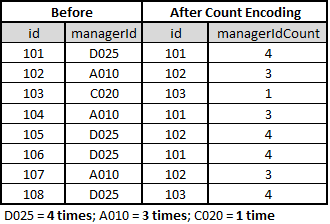

Another way to refer to variables that have a multitude of categories, is to call them variables with high cardinality.

If we have categorical variables containing many multiple labels or high cardinality,then by using one hot encoding, we will expand the feature space dramatically.

One approach that is heavily used in Kaggle competitions, is to replace each label of the categorical variable by the count, this is the amount of times each label appears in the dataset. Or the frequency, this is the percentage of observations within that category. The 2 are equivalent.

Let's see how this works:

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("mercedes_benz.csv",usecols=["X1","X2"])

In [3]:
df.head()

,X1,X2
0,v,at
1,t,av
2,w,n
3,t,n
4,v,n


In [4]:
df.shape

(4209, 2)

### One Hot Encoding

In [5]:
pd.get_dummies(df).shape

(4209, 71)

In [6]:
# let's have a look at how many unique labels are there
for i in df.columns:
    print(i,"-",df[i].nunique())

X1 - 27
X2 - 44


In [7]:
# let's obtain the counts for each one of the labels in variable X2
# let's capture this in a dictionary that we can use to re-map the labels
df["X2"].value_counts().to_dict()

{'as': 1659,
 'ae': 496,
 'ai': 415,
 'm': 367,
 'ak': 265,
 'r': 153,
 'n': 137,
 's': 94,
 'f': 87,
 'e': 81,
 'aq': 63,
 'ay': 54,
 'a': 47,
 't': 29,
 'i': 25,
 'k': 25,
 'b': 21,
 'ao': 20,
 'z': 19,
 'ag': 19,
 'd': 18,
 'ac': 13,
 'g': 12,
 'y': 11,
 'ap': 11,
 'x': 10,
 'aw': 8,
 'at': 6,
 'h': 6,
 'an': 5,
 'al': 5,
 'q': 5,
 'p': 4,
 'av': 4,
 'ah': 4,
 'au': 3,
 'ar': 1,
 'af': 1,
 'c': 1,
 'l': 1,
 'aa': 1,
 'j': 1,
 'am': 1,
 'o': 1}

In [8]:
# And now let's replace each label in X2 by its count

# first we make a dictionary that maps each label to the counts
df_frequency_map = df["X2"].value_counts().to_dict()
df_frequency_map

{'as': 1659,
 'ae': 496,
 'ai': 415,
 'm': 367,
 'ak': 265,
 'r': 153,
 'n': 137,
 's': 94,
 'f': 87,
 'e': 81,
 'aq': 63,
 'ay': 54,
 'a': 47,
 't': 29,
 'i': 25,
 'k': 25,
 'b': 21,
 'ao': 20,
 'z': 19,
 'ag': 19,
 'd': 18,
 'ac': 13,
 'g': 12,
 'y': 11,
 'ap': 11,
 'x': 10,
 'aw': 8,
 'at': 6,
 'h': 6,
 'an': 5,
 'al': 5,
 'q': 5,
 'p': 4,
 'av': 4,
 'ah': 4,
 'au': 3,
 'ar': 1,
 'af': 1,
 'c': 1,
 'l': 1,
 'aa': 1,
 'j': 1,
 'am': 1,
 'o': 1}

In [9]:
# and now we replace X2 labels in the dataset df
df["X2"] = df["X2"].map(df_frequency_map)

In [10]:
df.head()

,X1,X2
0,v,6
1,t,4
2,w,137
3,t,137
4,v,137


### Advantages
- It is very simple to implement
- Does not increase the feature dimensional space

### Disadvantages
- If some of the labels have the same count, then they will be replaced with the same count and they will loose some valuable information.
- Adds somewhat arbitrary numbers, and therefore weights to the different labels, that may not be related to their predictive power

Follow this thread in Kaggle for more information: https://www.kaggle.com/general/16927